In [1]:
import sys
sys.path.insert(1, '../src')
import ians_work
import pandas as pd

In [2]:
contract, cust = ians_work.load_data()
contract.head()

,contract_id,customer_id,contract_start,contract_term,deposit,monthly_amt
0,1,127,8/17/2019,12,"$53,000.00","$11,600.00"
1,2,119,12/1/2019,22,"$77,000.00","$14,600.00"
2,3,160,5/1/2019,15,"$13,000.00","$22,800.00"
3,4,7,12/8/2019,23,"$56,000.00","$11,400.00"
4,5,144,2/11/2019,7,"$21,000.00","$19,800.00"


In [3]:
cust.head()

,id,company,sector,industry,email,address,city,state,zip
0,1,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,2,Izio,Energy,Oil & Gas Production,farlet1@comcast.net,15360 Village Green Street,Spokane,WA,99252
2,3,Twitterworks,NaN,NaN,alerohan2@ox.ac.uk,29 Hovde Hill,Milwaukee,WI,53234
3,4,Viva,Health Care,Major Pharmaceuticals,wgiovanitti3@nytimes.com,074 Center Place,Topeka,KS,66667
4,5,Jabberstorm,Technology,Computer Software: Prepackaged Software,pscallon4@fc2.com,4 Moose Way,Terre Haute,IN,47805


In [4]:
df = ians_work.combine_data(contract, cust)
df.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip
customer_id,,,,,,,,,,,,,
1,41,5/31/2019,24,"$86,000.00","$11,200.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,358,6/18/2019,13,"$74,000.00","$19,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,400,8/11/2019,19,"$38,000.00","$8,800.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,424,3/13/2019,15,"$77,000.00","$14,300.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170
1,438,10/16/2019,22,"$39,000.00","$20,000.00",Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170


In [5]:
df['deposit'] = pd.to_numeric(df['deposit'].str.replace("[$,]",""))
df['monthly_amt'] = pd.to_numeric(df['monthly_amt'].str.replace("[$,]",""))
df['total'] = df['deposit'] + (df['monthly_amt'] * df['contract_term'])
df.head()

,contract_id,contract_start,contract_term,deposit,monthly_amt,company,sector,industry,email,address,city,state,zip,total
customer_id,,,,,,,,,,,,,,
1,41,5/31/2019,24,86000.0,11200.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,354800.0
1,358,6/18/2019,13,74000.0,19000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,321000.0
1,400,8/11/2019,19,38000.0,8800.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,205200.0
1,424,3/13/2019,15,77000.0,14300.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,291500.0
1,438,10/16/2019,22,39000.0,20000.0,Bubblebox,Capital Goods,Military/Government/Technical,kyerson0@bizjournals.com,76 Randy Circle,San Diego,CA,92170,479000.0


In [6]:
vis_df = df.groupby('state').agg({'total':'sum'})
vis_df.head()

,total
state,
AK,2111900.0
AL,1896400.0
AR,293200.0
AZ,5670700.0
CA,22211000.0


## Total Sales by State
Below is a depiciton of the top states by gross income. This helps to illustrate where we need to invest in infrastructure to better support our customers.

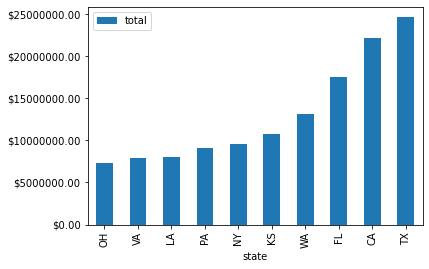

In [7]:
vis_df.sort_values('total').tail(10).plot(kind='bar').yaxis.set_major_formatter('${x:1.2f}')

## Industry that pays the most in deposits
Identify where we are receiving the most up front revenue by industry to help identify where we can focus our sales efforts to get quick, short term revenue.

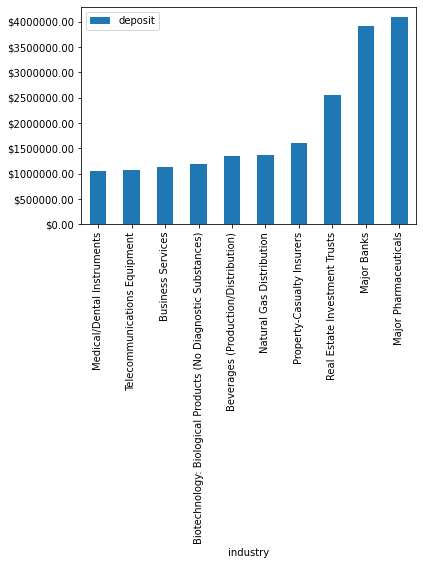

In [8]:
vis_df2 = df.groupby('industry').agg({'deposit':'sum'})
vis_df2.sort_values('deposit').tail(10).plot(kind='bar').yaxis.set_major_formatter('${x:1.2f}')

In [9]:
import matplotlib.pyplot as plt

In [10]:
vis_df2 = vis_df2.sort_values('deposit').tail(10)

In [11]:
vis_df2.reset_index(inplace=True)

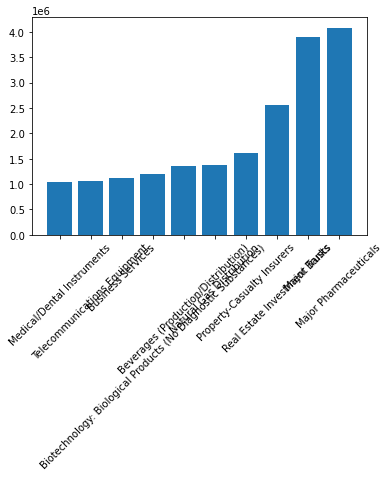

In [12]:
plt.bar(vis_df2['industry'], vis_df2['deposit'])
plt.xticks(rotation=45)
#.yaxis.set_major_formatter('${x:1.2f}')

plt.show()